In [1]:
import os
import os.path
import numpy as np
import shutil
import random


root_dir= 'C:/Users/tarek/Desktop/17flowers_jpg/jpg' #path of the original folder
                                                         #remember path should be like 'home/Desktop/flowers'

root_dir = root_dir+"/"
classes =  ['Buttercup', 'Daffodil', 'Sunflower', 'Cowslip', 'Windflower'] # classes



if not os.path.exists(root_dir+'train'): #check if train file exists, otherwise initiate creation of partitions
        #test,validation,training directories
    os.mkdir(root_dir +'train/')
    os.mkdir(root_dir +'val/')
    os.mkdir(root_dir +'test/')


    #create directories for each class
    for cls in classes: 
        os.makedirs(root_dir +'train/' + cls)
        os.makedirs(root_dir +'val/' + cls)
        os.makedirs(root_dir +'test/' + cls)




        #Daffodil class
    flower_type= 'Daffodil'
    for i in range(1,51) : #train data
        if i<10:
            shutil.move(root_dir +'image_000'+str(i)+'.jpg', root_dir +'/train/'+flower_type)
        if i>=10:
            shutil.move(root_dir +'image_00'+str(i)+'.jpg', root_dir +'/train/'+flower_type) 

    for i in range(51,71) : #val data
        shutil.move(root_dir +'image_00'+str(i)+'.jpg', root_dir +'/val/'+flower_type)

    for i in range(71,81) : #test data
        shutil.move(root_dir +'image_00'+str(i)+'.jpg', root_dir +'/test/'+flower_type)


        #Buttercup class
    flower_type = 'Buttercup'
    for i in range(1121,1171) : #train data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/train/'+flower_type)

    for i in range(1171,1191) : #val data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/val/'+flower_type)

    for i in range(1191,1201) : #test data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/test/'+flower_type)


        #Sunflower class
    flower_type = 'Sunflower'
    for i in range(721,771) : #train data
        shutil.move(root_dir +'image_0'+str(i)+'.jpg', root_dir +'/train/'+flower_type)

    for i in range(771,791) : #val data
        shutil.move(root_dir +'image_0'+str(i)+'.jpg', root_dir +'/val/'+flower_type)

    for i in range(791,801) : #test data
        shutil.move(root_dir +'image_0'+str(i)+'.jpg', root_dir +'/test/'+flower_type)


        #Cowslip class
    flower_type = 'Cowslip'
    for i in range(1041,1091) : #train data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/train/'+flower_type)

    for i in range(1091,1111) : #val data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/val/'+flower_type)

    for i in range(1111,1121) : #test data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/test/'+flower_type)


        #Windflower class
    flower_type = 'Windflower'
    for i in range(1201,1251) : #train data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/train/'+flower_type)

    for i in range(1251,1271) : #val data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/val/'+flower_type)

    for i in range(1271,1281) : #test data
        shutil.move(root_dir +'image_'+str(i)+'.jpg', root_dir +'/test/'+flower_type)





# 1. Define Generators

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras import models
import numpy as np
import matplotlib.pyplot as plt
import os


if not root_dir is None: #if root directory is not null then assign it to base directory
    base_dir = root_dir

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
val_dir = os.path.join(base_dir,'val')

train_datagen = ImageDataGenerator(rotation_range=40, rescale = 1./255, width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip = True,fill_mode='nearest')


#train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150), batch_size=10 #20
                                                    ,class_mode='categorical')
val_generator = test_datagen.flow_from_directory(val_dir,target_size=(150,150), batch_size=5 #20 
                                                 ,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150), batch_size=10 #20
                                                  ,class_mode='categorical'
                                               # , shuffle = True
                                                    )
datagen = ImageDataGenerator(rescale=1.0/255)
batch_size =10 #20

Found 250 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


# 2. Test the Generators

In [3]:
import matplotlib.pyplot as plt

#print shapes of images and labels
for data_batch , label_batch  in train_generator:
    print('data batch shape ', data_batch.shape)
    print('label batch shape ', label_batch.shape)
    print('sample data shape', data_batch[2].shape)
    print('sample 10 labels ',label_batch)
    
    break

data batch shape  (10, 150, 150, 3)
label batch shape  (10, 5)
sample data shape (150, 150, 3)
sample 10 labels  [[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


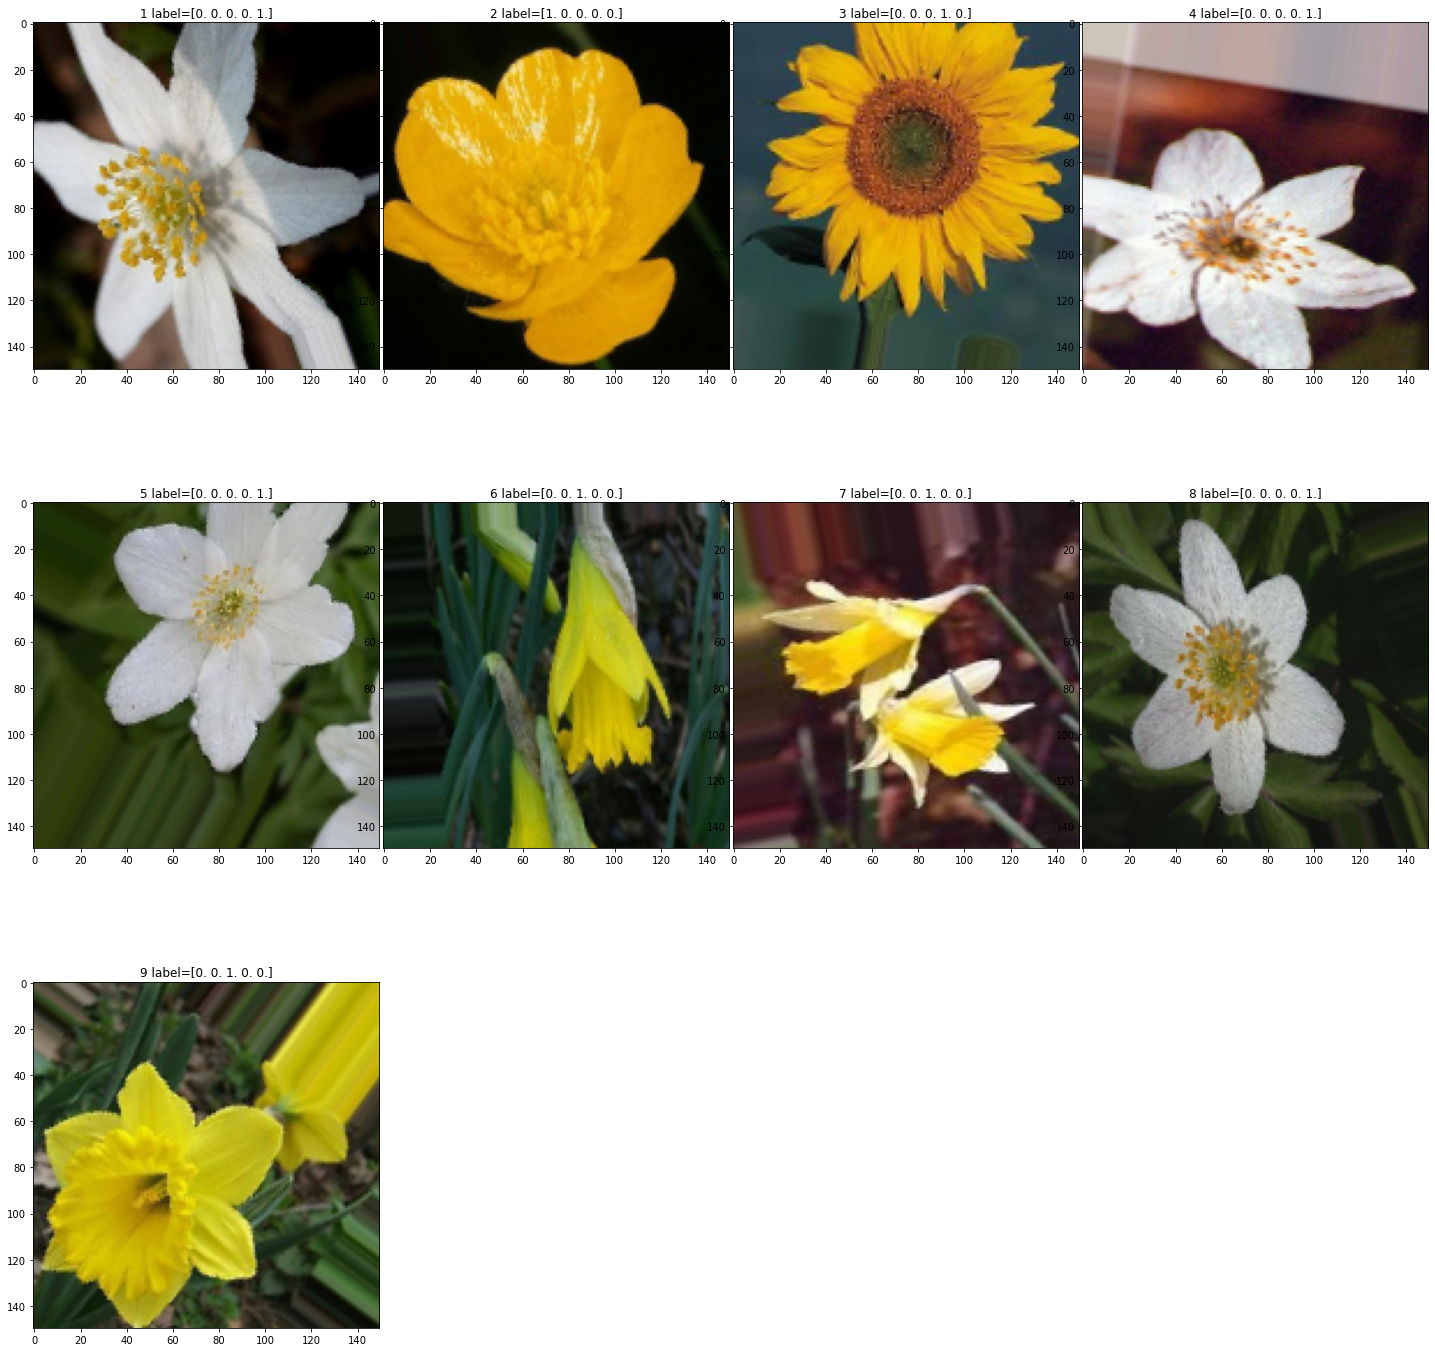

In [4]:
fig = plt.figure(figsize=(25,25))
columns = 4
rows = 3
for i in range(1, 10):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=None, wspace = 0.01)
    ax.title.set_text(str(i)+" label=" + str(label_batch[i]))
    plt.imshow(img)
plt.show()

# 3. Define the network

In [5]:
from keras import models, layers
from tensorflow.keras import regularizers

network = models.Sequential()
network.add(layers.Conv2D(32,(3,3),activation='relu',
                          kernel_regularizer=regularizers.l2(0.01),
                          input_shape=(150,150,3)))
network.add(layers.MaxPooling2D(2,2))

network.add(layers.Conv2D(64, (3,3), activation="relu"))
network.add(layers.MaxPooling2D(2,2))

network.add(layers.Conv2D(128, (3,3), activation="relu"))
network.add(layers.MaxPooling2D(2,2))

network.add(layers.Conv2D(128, (3,3), activation="relu"))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Dropout(0.5))

network.add(layers.Flatten())
network.add(layers.Dense(512,activation="relu"))
network.add(layers.Dense(5,activation='softmax')) #output

#network.add(layers.Dense(1,activation='sigmoid'))

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# 4. Compile the Network

In [6]:
from tensorflow.keras import optimizers

network.compile(loss='categorical_crossentropy',optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#fit the model
history = network.fit(train_generator, steps_per_epoch= 10,epochs = 25,
                               validation_data=val_generator, validation_steps=10 )


Epoch 1/25
10/10 [==============================] - 3s 286ms/step - loss: 1.6669 - acc: 0.2500 - val_loss: 1.6235 - val_acc: 0.2400
Epoch 2/25
10/10 [==============================] - 3s 280ms/step - loss: 1.5408 - acc: 0.3600 - val_loss: 1.4872 - val_acc: 0.2800
Epoch 3/25
10/10 [==============================] - 3s 269ms/step - loss: 1.3711 - acc: 0.4500 - val_loss: 1.2636 - val_acc: 0.4800
Epoch 4/25
10/10 [==============================] - 3s 281ms/step - loss: 1.1604 - acc: 0.5600 - val_loss: 1.2664 - val_acc: 0.4200
Epoch 5/25
10/10 [==============================] - 3s 275ms/step - loss: 1.2201 - acc: 0.4800 - val_loss: 1.3173 - val_acc: 0.5400
Epoch 6/25
10/10 [==============================] - 3s 278ms/step - loss: 1.0574 - acc: 0.6100 - val_loss: 1.1555 - val_acc: 0.5400
Epoch 7/25
10/10 [==============================] - 3s 290ms/step - loss: 0.8989 - acc: 0.6800 - val_loss: 1.1885 - val_acc: 0.6000
Epoch 8/25
10/10 [==============================] - 3s 289ms/step - loss: 1.

In [7]:
#network.save('images_CNN')
#from keras import models
#network = models.load_model('images_CNN_output')#from keras import models
#network = models.load_model('images_CNN_output')
#network  = models.load_model(filepath)

# 5. Plot Results

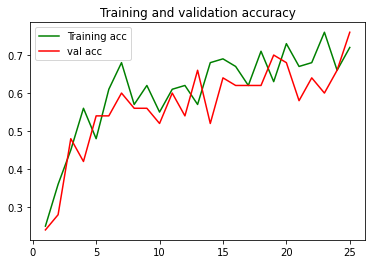

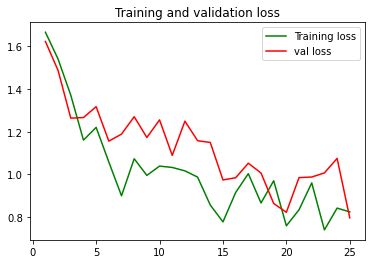

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'g', label = 'Training acc')
plt.plot(epochs, val_acc,'r',label = 'val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label = 'val loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
#total accuracy on test set
res = network.evaluate_generator(test_generator, steps=10,verbose=1)
print('Accuracy on test set: %.3f'% res[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
 5/10 [==============>...............] - 0s 66ms/step - loss: 1.0860 - acc: 0.5400
Accuracy on test set: 0.540


# Feature maps

In [10]:
# method to display feature maps
def display_feature_maps(network,img_array,layer_no, no_cols=4):
    
    layer_outputs = [layer.output for layer in network.layers]
    activations_model = models.Model(inputs=network.input, outputs = layer_outputs)
    activations = activations_model.predict(img_array)
    
    # collect images in list

    no_maps = np.shape(activations[layer_no])[-1]    
    print("layer %d, no maps %d"%(layer_no, no_maps))
    fmaps =activations[layer_no]
    img_list = []
    for i in range(no_maps):
        img = fmaps[0,:,:,i]
        img_list.append(img)

#    display images in no_cols
    
    no_rows = no_maps // no_cols
    i = 0
    for row in range(no_rows):
        fig, axs = plt.subplots(1, no_cols,figsize=(18,18))
        for col in range(no_cols):
            axs[col].axis('off')
            axs[col].imshow(img_list[i])
            axs[col].set_title(str(i))
            i +=1
            
        plt.show()



In [11]:
#get index for a given layer name
def get_index(network,layer_name):
    layer_names = [layer.name for layer in network.layers]
    return layer_names.index(layer_name)

layer 4, no maps 128


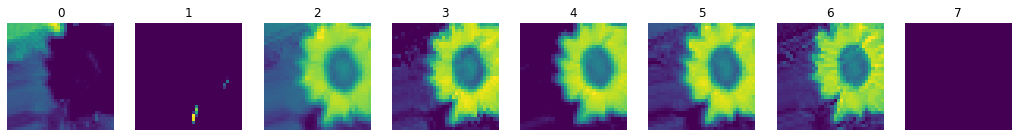

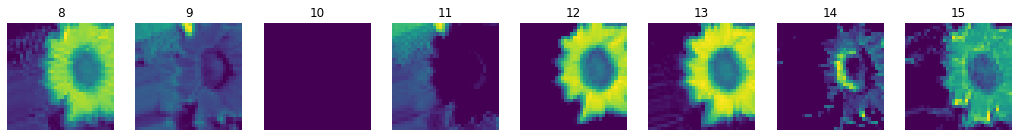

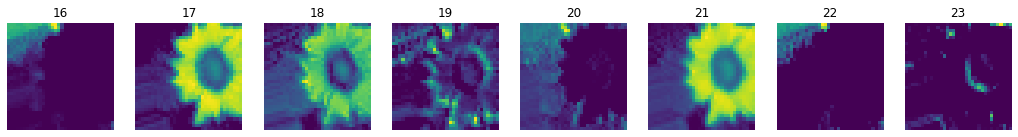

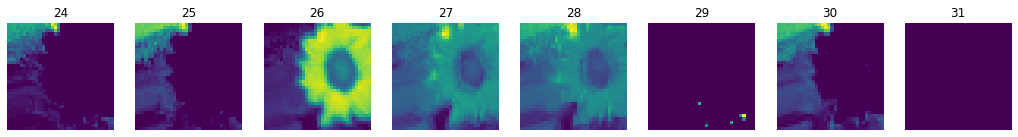

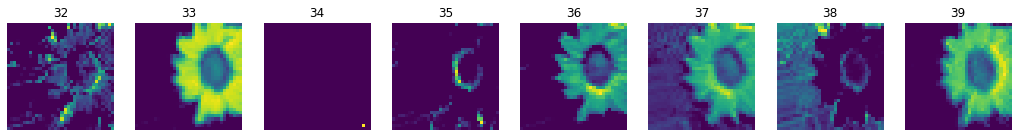

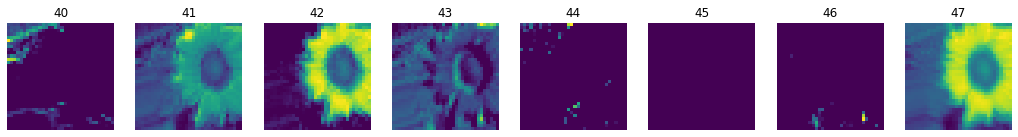

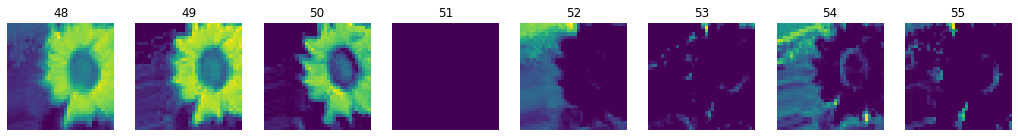

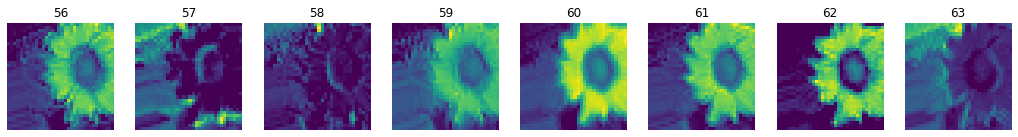

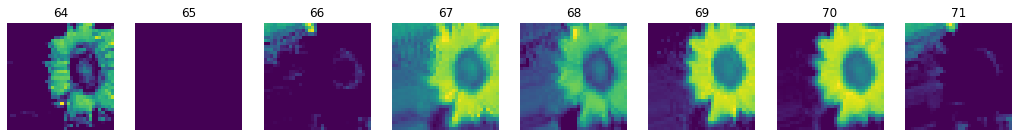

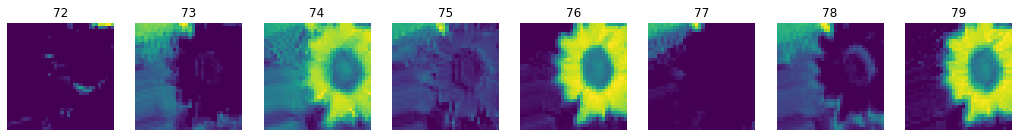

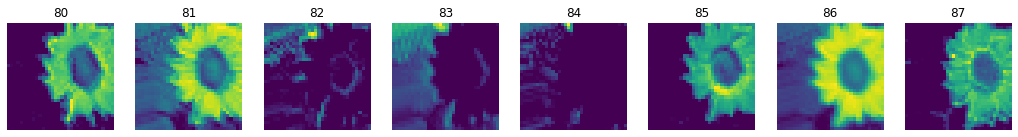

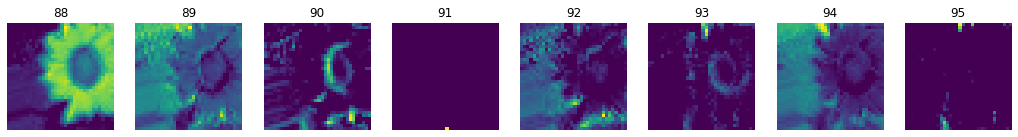

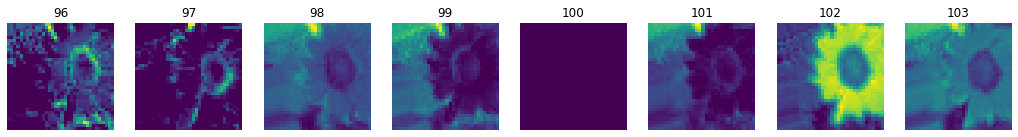

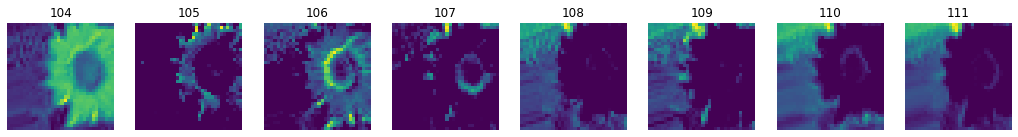

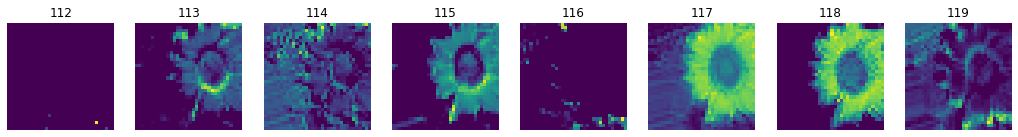

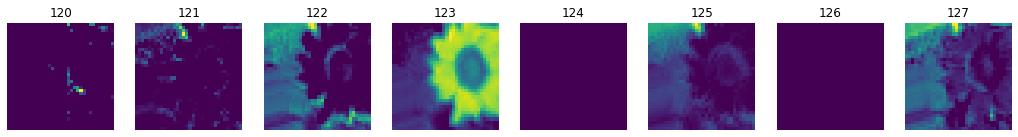

In [12]:
from keras.preprocessing import image

img1 = data_batch[0]  # PICK AN IMAGE.  
img1_array = image.img_to_array(img1)
img1_array = np.expand_dims(img1_array, axis=0)
layer_no = get_index(network,'conv2d_2' )
display_feature_maps(network, img1_array,layer_no,8)





# Transfer Learning: Feature extraction (Better Approach)





In [13]:
from keras.applications import VGG16
vgg_base = VGG16(weights = 'imagenet', include_top = False, input_shape=(150,150,3))
#vgg_base.summary()

In [14]:
def extract_features(dir, sample_count):
    features = np.zeros((sample_count,4,4,512))
    labels =  np.zeros((sample_count, 5))
    generator = datagen.flow_from_directory(dir,target_size=(150,150),batch_size = batch_size, class_mode = 'categorical')
    
    i = 0 
  
    for inputs_batch, labels_batch in generator:
        features_batch = vgg_base.predict(inputs_batch)

        features[i*batch_size:(i+1)*batch_size] = features_batch
       # print(features.shape)
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i +=1

        if i *batch_size >= sample_count:
            break

    return features,labels
    

In [15]:
train_features , train_labels = extract_features(train_dir,250)
validation_features, validation_labels = extract_features(val_dir,50)
test_features,test_labels = extract_features(test_dir,100)

Found 250 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [16]:
train_features = np.reshape(train_features,(250,4*4*512))
validation_features = np.reshape(validation_features,(50,4*4*512))
test_features = np.reshape(test_features,(100,4*4*512))

In [17]:
from keras import models,layers, optimizers

network = models.Sequential()
network.add(layers.Dense(256,activation = 'relu', input_shape = (4*4*512,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(5,activation = 'softmax'))


network.compile(optimizer= optimizers.RMSprop(lr=2e-5),loss = 'categorical_crossentropy', metrics = ['acc'])
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
Total params: 2,098,693
Trainable params: 2,098,693
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = network.fit(train_features,train_labels , 
                      epochs = 70,batch_size = 10, validation_data = (validation_features,validation_labels)
                    #  ,shuffle=True
                     )

Epoch 1/70
25/25 [==============================] - 1s 31ms/step - loss: 1.6715 - acc: 0.2840 - val_loss: 1.3999 - val_acc: 0.5000
Epoch 2/70
25/25 [==============================] - 1s 25ms/step - loss: 1.3604 - acc: 0.4600 - val_loss: 1.2456 - val_acc: 0.6400
Epoch 3/70
25/25 [==============================] - 1s 26ms/step - loss: 1.0913 - acc: 0.5760 - val_loss: 1.1093 - val_acc: 0.6800
Epoch 4/70
25/25 [==============================] - 1s 26ms/step - loss: 0.9164 - acc: 0.6880 - val_loss: 1.0664 - val_acc: 0.6600
Epoch 5/70
25/25 [==============================] - 1s 25ms/step - loss: 0.7445 - acc: 0.7440 - val_loss: 0.9621 - val_acc: 0.7200
Epoch 6/70
25/25 [==============================] - 1s 26ms/step - loss: 0.6104 - acc: 0.8160 - val_loss: 0.9574 - val_acc: 0.7000
Epoch 7/70
25/25 [==============================] - 1s 26ms/step - loss: 0.4906 - acc: 0.8920 - val_loss: 0.9379 - val_acc: 0.6800
Epoch 8/70
25/25 [==============================] - 1s 25ms/step - loss: 0.4229 - a

25/25 [==============================] - 1s 25ms/step - loss: 0.0063 - acc: 1.0000 - val_loss: 1.2731 - val_acc: 0.7600
Epoch 64/70
25/25 [==============================] - 1s 25ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 1.1945 - val_acc: 0.7600
Epoch 65/70
25/25 [==============================] - 1s 26ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.2376 - val_acc: 0.7600
Epoch 66/70
25/25 [==============================] - 1s 25ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.2361 - val_acc: 0.7600
Epoch 67/70
25/25 [==============================] - 1s 26ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.2313 - val_acc: 0.7600
Epoch 68/70
25/25 [==============================] - 1s 26ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.1687 - val_acc: 0.7600
Epoch 69/70
25/25 [==============================] - 1s 25ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.1777 - val_acc: 0.7600
Epoch 70/70
25/25 [==============================] - 1s 26ms/step - loss: 0.0024 - acc: 

# Plot the results

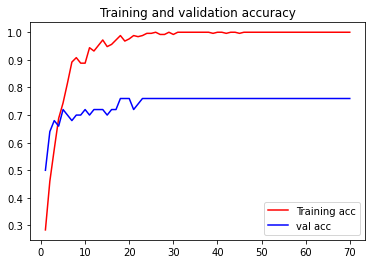

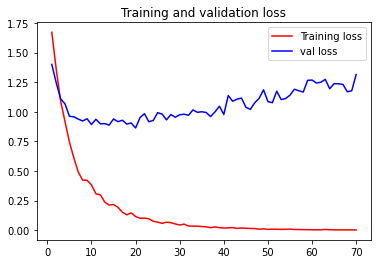

4/4 [==============================] - 0s 6ms/step - loss: 2.0340 - acc: 0.6200
test accuracy  = 0.6200000047683716


In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc,'b',label = 'val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'val loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
#report the accuracy on test set
#test_datagenerator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=10,class_mode='categorical')

res = network.evaluate(test_features,test_labels)
print("test accuracy  =",res[1])